<a href="https://colab.research.google.com/github/Juanights/Curso-PythonDataScience/blob/main/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTRUTURA DO PROJETO**

**PASSO 1 - Importar as bibliotecas necessárias**

In [ ]:
import os
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PASSO 2 - Percorrer todos os arquivos (planilhas) existentes dentro de uma pasta no Google Drive**

In [ ]:
lista_planilhas = os.listdir('/content/drive/MyDrive/Pyhon para data science/Projeto2/Arquivos')
display(lista_planilhas)

['Devolucoes+-+Belo+Horizonte.csv',
 'Devolucoes+-+Curitiba.csv',
 'Devolucoes+-+Fortaleza.csv',
 'Devolucoes+-+Goiás.csv',
 'Devolucoes+-+Porto+Alegre.csv',
 'Devolucoes+-+Recife.csv',
 'Devolucoes+-+Rio+de+Janeiro.csv',
 'Devolucoes+-+Salvador.csv',
 'Devolucoes+-+São+Paulo.csv',
 'Vendas+-+Belo+Horizonte.csv',
 'Vendas+-+Curitiba.csv',
 'Vendas+-+Fortaleza.csv',
 'Vendas+-+Goiás.csv',
 'Vendas+-+Porto+Alegre.csv',
 'Vendas+-+Recife.csv',
 'Vendas+-+Rio+de+Janeiro.csv',
 'Vendas+-+Salvador.csv',
 'Vendas+-+São+Paulo.csv']

**PASSO 3 - Importar todos os arquivos (planilhas) de vendas e unificá-las numa única tabela (DataFrame) no Pandas**

In [ ]:
total_vendas = pd.DataFrame()

for planilha in lista_planilhas:
  if 'Vendas' in planilha:
    tabela = pd.read_csv(f'/content/drive/MyDrive/Pyhon para data science/Projeto2/Arquivos/{planilha}')
    total_vendas = pd.concat([total_vendas, tabela])
display(total_vendas)

,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2023,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2023,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2023,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2023,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2023,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


**PASSO 4 - Importar todos os arquivos (planilhas) de devoluções e unificá-las numa única tabela (DataFrame) no Pandas**

In [ ]:
total_devolucoes = pd.DataFrame()

for planilha in lista_planilhas:
  if 'Devolucoes' in planilha:
    tabela = pd.read_csv(f'/content/drive/MyDrive/Pyhon para data science/Projeto2/Arquivos/{planilha}')
    total_devolucoes = pd.concat([total_devolucoes, tabela])
display(total_devolucoes)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


# **INDICADORES**

**1.0 - QUANTIDADE DE VENDAS LÍQUIDAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [ ]:
qtd_produto_vl = total_vendas[['SKU', 'Produto', 'Quantidade']].groupby(['SKU', 'Produto']).sum().sort_values(by='Quantidade', ascending=False)
qtd_lojas_vl = total_vendas[['Loja', 'Quantidade']].groupby(['Loja']).sum().sort_values(by='Quantidade', ascending=False)
display(HTML('<h2>Quantidade de vendas líquidas dos 3 principais produtos</h2>'))
display(qtd_produto_vl.head(3))
display(HTML('<br><hr></hr></br>'))
display(HTML('<h2>Quantidade de vendas líquidas das 3 principais lojas</h2>'))
display(qtd_lojas_vl.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,8974
HL4379,Televisão,5931
HL8851,Notebook,3249


,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


In [ ]:
# Graficos

grafico_pizza = px.pie(qtd_produto_vl.reset_index(), names='Produto' , values='Quantidade', title='Quantidade de vendas liquidas por produto')
grafico_pizza.update_traces(textposition='inside', textinfo='label+percent')
grafico_pizza.show()

# Grafico Barra

grafico_1 = px.bar(qtd_lojas_vl.reset_index(), x='Loja', y='Quantidade', title='Quantidade de vendas liquidas por lojas', color='Quantidade')
grafico_1.show()

**1.1 - QUANTIDADE DE VENDAS BRUTAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [ ]:
qtd_produto_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['SKU','Produto' ])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)
qtd_lojas_vb = pd.DataFrame(pd.concat([total_devolucoes, total_vendas]).groupby('Loja')['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)
display(HTML('<h2>Quantidade de vendas brutas dos 3 principais produtos</h2>'))
display(qtd_produto_vb.head(3))

display(HTML('<br><hr></hr></br>'))
display(HTML('<h2>Quantidade de vendas brutas das 3 principais lojas</h2>'))
display(qtd_lojas_vb.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


In [ ]:
# Grafico 3
grafico_3 = px.bar(
    qtd_produto_vb.reset_index(),
    x='Produto',
    y='Quantidade',
    title='Quantidade de vendas brutas por produtos',
    color='Produto'


)

grafico_3.update_xaxes(categoryorder='total descending')
grafico_3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='green',
)
grafico_3.show()

In [ ]:
grafico_4 = px.bar(
    qtd_lojas_vb.reset_index(),
    x='Loja',
    y='Quantidade',
    title='Quantidade de vendas brutas por loja',
    color='Loja',


)

grafico_4.update_layout(
    xaxis={
        'tickfont': {
            'color':'blue',
            'size': 14,
        },
        'title':{
            'text': 'Eixo X',
            'font': {
                'color':'black',
                'size': 18,
            }
        }
    },
     yaxis={
        'tickfont':{
            'color': 'red',
            'size':14,
        },
        'title': {
          'text': 'Eixo Y',
          'font':{
            'color':'violet',
            'size': 18
           }
       }
   }
)


grafico_4.show()

**1.2 - QUANTIDADE DE DEVOLUÇÕES:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais devoluções.

In [ ]:
devolucao_loja = total_devolucoes[['Loja', 'Quantidade']].groupby('Loja').sum().sort_values(by='Quantidade', ascending=False)
devolucao_produto = total_devolucoes[['Produto', 'Quantidade']].groupby(['Produto']).sum().sort_values(by='Quantidade', ascending=False)
display(HTML('<h2>Quantidade de devoluções dos 3 principais produtos</h2>'))
display(devolucao_produto.head(3))

display(HTML('<br><hr></hr></br>'))
display(HTML('<h2>Quantidade de devoluções das 3 principais lojas</h2>'))
display(devolucao_loja.head(3))


,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


,Categoria,Quantidade,Tipo
São Paulo,São Paulo,300,Loja
Fortaleza,Fortaleza,271,Loja
Rio de Janeiro,Rio de Janeiro,221,Loja
Salvador,Salvador,199,Loja
Curitiba,Curitiba,121,Loja
Porto Alegre,Porto Alegre,112,Loja
Belo Horizonte,Belo Horizonte,107,Loja
Goiás,Goiás,104,Loja
Recife,Recife,82,Loja
SmartWatch,SmartWatch,395,Produto


Text(0.5, 1.0, 'Quantidade de devoluções por Loja e Produtos')

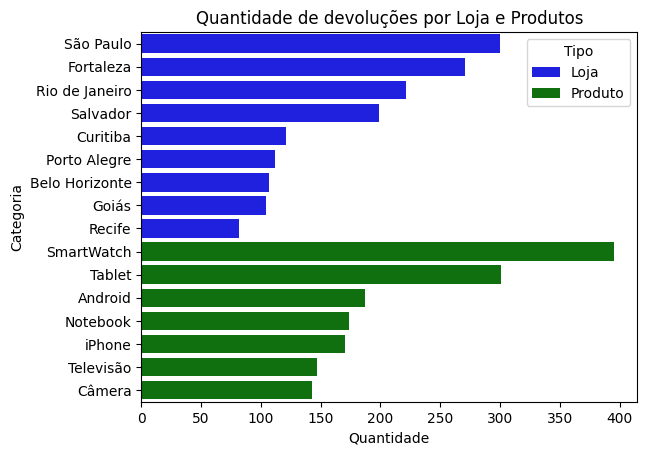

In [ ]:
devolucao_produto_grafico = pd.DataFrame(
    {
        'Categoria': devolucao_produto.index,
        'Quantidade':devolucao_produto['Quantidade'],
        'Tipo':['Produto'] * len(devolucao_produto),


    }
)

devolucao_loja_grafico = pd.DataFrame(
    {
        'Categoria': devolucao_loja.index,
        'Quantidade': devolucao_loja['Quantidade'],
        'Tipo':['Loja'] * len(devolucao_loja),

    }
)
# Concatenar os Df

df_concatenado = pd.concat([devolucao_loja_grafico, devolucao_produto_grafico])

display(df_concatenado)
cores = {'Produto': 'green', 'Loja': 'blue'}
grafico_5 = sns.barplot(df_concatenado, x='Quantidade',y='Categoria', hue='Tipo', orient='y', palette=cores )
grafico_5.set_title('Quantidade de devoluções por Loja e Produtos')


**2.0 - ANÁLISE DE SAZONALIDADE:**

**Objetivo:** Calcular a variação das vendas dos produtos por mês.

In [ ]:
data = pd.to_datetime(total_vendas['Data'], format="%m/%d/%Y")
venda_mensal = pd.DataFrame(
    {
      'Data': data,
      'Quantidade': total_vendas['Quantidade']

    }

)

venda_mensal = venda_mensal.set_index('Data').resample('M').sum()
venda_mensal.index = venda_mensal.index.strftime('%b/%Y')
venda_mensal['Variacao'] = venda_mensal['Quantidade'].diff()

display(HTML('<h2>Variação de vendas de produtos por mês</h2>'))
display(venda_mensal)

,Quantidade,Variacao
Data,,
Jan/2023,2553,NaN
Feb/2023,2508,-45.0
Mar/2023,2538,30.0
Apr/2023,2366,-172.0
May/2023,2357,-9.0
Jun/2023,2584,227.0
Jul/2023,2666,82.0
Aug/2023,2400,-266.0
Sep/2023,2446,46.0


In [ ]:
text_color = np.where(venda_mensal['Variacao'] < 0, 'red', 'blue')

grafico_6 = px.line(venda_mensal.reset_index(), x='Data', y='Quantidade', title='Vendas Mensais x Sazonalizade', markers=True, text='Quantidade')
grafico_6.update_traces(textposition= 'top left', textfont=dict(color=text_color, size=15), marker=dict(color=text_color))

grafico_6.show()

**2.1 - ANÁLISE DE FATURAMENTO TRIMESTRAL:**

**Objetivo:** Calcular o faturamento trimestral do ano.

In [ ]:
faturamento_trimestral = pd.DataFrame(
     {
      'Data': data,
      'Quantidade': total_vendas['Quantidade'],
      'Valor Unitário': total_vendas['Valor Unitário'],
      'Faturamento': total_vendas['Valor Unitário'] * total_vendas['Quantidade']

    }
 )

faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period('Q')

faturamento_trimestral = pd.DataFrame(faturamento_trimestral.groupby(['Trimestre'])['Faturamento'].sum())

display(HTML('<h2>Faturamento Trimestral</h2>'))
display(faturamento_trimestral)

,Faturamento
Trimestre,
2023Q1,25038900
2023Q2,24163700
2023Q3,24970600
2023Q4,25146300


In [ ]:
text_color = np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red', 'blue' )
faturamento_trimestral.index = faturamento_trimestral.index.astype(str)

grafico_7 = px.area(
    faturamento_trimestral.reset_index(), x='Trimestre', y='Faturamento',
    title='Faturamento trimestral', markers=True,
   )

grafico_7.update_layout(
    margin=dict(t=50, l=300, r=300, b=50),
    title=dict(x=0.5)
)

grafico_7.update_traces(
    fillcolor='#87CEEB',
    line_color='#1E90FF',
    marker=dict(color=text_color)
)

grafico_7.show()